In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the preprocessed data
df = pd.read_csv('EDA - RF.csv',index_col=0)

In [3]:
df.head()

,time,temperature,dewPoint,humidity,pressure,windSpeed,windGust,cloudCover,visibility,ozone,east_wind,south_wind,west_wind,PM2
0,2019-01-01 23:00:00,3.20,0.01,0.80,NaN,9.3,18.49,0.75,10.003,314.2,0,0,1,12.9
1,2019-01-02 00:00:00,2.20,0.01,0.85,NaN,8.8,NaN,0.75,10.003,315.5,0,0,1,5.5
2,2019-01-02 01:00:00,2.20,-1.01,0.79,NaN,7.2,NaN,0.75,10.003,315.7,0,0,1,4.7
3,2019-01-02 02:00:00,1.20,0.01,0.92,NaN,7.2,NaN,0.75,2.003,316.5,0,0,1,5.7
4,2019-01-02 03:00:00,0.22,0.01,0.99,NaN,7.2,NaN,0.75,1.498,318.5,0,0,1,6.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16895 entries, 0 to 16894
Data columns (total 14 columns):
time           16895 non-null object
temperature    16895 non-null float64
dewPoint       16895 non-null float64
humidity       16895 non-null float64
pressure       14084 non-null float64
windSpeed      16724 non-null float64
windGust       14151 non-null float64
cloudCover     15890 non-null float64
visibility     16865 non-null float64
ozone          16895 non-null float64
east_wind      16895 non-null int64
south_wind     16895 non-null int64
west_wind      16895 non-null int64
PM2            16895 non-null float64
dtypes: float64(10), int64(3), object(1)
memory usage: 1.9+ MB


In [5]:
# drop rows with unknown values
df_dropna = df.dropna().reset_index()

In [6]:
# convert dates to datetime format
df_dropna['time'] = pd.to_datetime(df_dropna['time'],format = '%Y-%m-%d %H:%M:%S')

# create new feature month
df_dropna['month'] = df_dropna['time'].apply(lambda time: time.month)

# create new feature hour
df_dropna['hour'] = df_dropna['time'].apply(lambda time: time.hour)

# create new feature weekday
df_dropna['weekday'] = df_dropna['time'].apply(lambda time: time.weekday())

In [7]:
# create checkpoint
df_time = df_dropna.copy()

In [8]:
# create dummy variables from month (by seasons), hour (by part of the day), and weekday (weekend or not)
def month_map(month):
    if month in [12,1,2]:
        return 'winter'
    elif month in [3,4,5]:
        return 'spring'
    elif month in [6,7,8]:
        return 'summer'
    else:
        return 'fall'

def hour_map(hour):
    if hour in range(0,6):
        return 'night'
    elif hour in range(6,12):
        return 'morning'
    elif hour in range(12,18):
        return 'afternoon'
    else:
        return 'evening'
    
def weekday_map(weekday):
    if weekday in range(0,5):
        return 'workday'
    else:
        return 'weekend'

df_time['month'] = df_time['month'].apply(month_map)
df_time['hour'] = df_time['hour'].apply(hour_map)
df_time['weekday'] = df_time['weekday'].apply(weekday_map)

In [9]:
# create checkpoint
df_time_dummies = df_time.copy()
season_columns = pd.get_dummies(df_time_dummies['month'], drop_first = True)
daypart_columns = pd.get_dummies(df_time_dummies['hour'], drop_first = True)
weekend_columns = pd.get_dummies(df_time_dummies['weekday'], drop_first = True)


In [10]:
# concatenate column values
# create checkpoint
df_dummies = pd.concat([df_time_dummies,season_columns,daypart_columns,weekend_columns], axis = 1)

df_dummies.head()

,index,time,temperature,dewPoint,humidity,pressure,windSpeed,windGust,cloudCover,visibility,...,month,hour,weekday,spring,summer,winter,evening,morning,night,workday
0,2811,2019-05-01 20:00:00,11.82,6.51,0.70,1007.1,3.94,7.24,0.56,14.470,...,spring,evening,workday,1,0,0,1,0,0,1
1,2812,2019-05-01 21:00:00,11.34,8.30,0.82,1007.3,4.19,8.85,0.75,11.226,...,spring,evening,workday,1,0,0,1,0,0,1
2,2813,2019-05-01 22:00:00,11.07,8.96,0.87,1007.1,4.34,9.73,0.80,11.814,...,spring,evening,workday,1,0,0,1,0,0,1
3,2814,2019-05-01 23:00:00,10.98,9.22,0.89,1006.8,4.63,10.31,0.80,14.340,...,spring,evening,workday,1,0,0,1,0,0,1
4,2815,2019-05-02 00:00:00,10.85,9.54,0.92,1006.3,4.34,10.61,0.76,16.093,...,spring,night,workday,1,0,0,0,0,1,1


In [11]:
# drop time, month, hour, weekday columns
# checkpoint
df_prep = df_dummies.drop(['time','month','hour','weekday','ozone','windGust','dewPoint'], axis = 1)

df_prep.columns.values


array(['index', 'temperature', 'humidity', 'pressure', 'windSpeed',
       'cloudCover', 'visibility', 'east_wind', 'south_wind', 'west_wind',
       'PM2', 'spring', 'summer', 'winter', 'evening', 'morning', 'night',
       'workday'], dtype=object)

In [12]:
df_prep = df_prep[['temperature', 'humidity', 'pressure', 'windSpeed',
       'visibility', 'east_wind', 'south_wind', 'west_wind','spring', 'summer', 'winter', 'evening', 'morning', 'night',
       'workday','PM2']]

df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14084 entries, 0 to 14083
Data columns (total 16 columns):
temperature    14084 non-null float64
humidity       14084 non-null float64
pressure       14084 non-null float64
windSpeed      14084 non-null float64
visibility     14084 non-null float64
east_wind      14084 non-null int64
south_wind     14084 non-null int64
west_wind      14084 non-null int64
spring         14084 non-null uint8
summer         14084 non-null uint8
winter         14084 non-null uint8
evening        14084 non-null uint8
morning        14084 non-null uint8
night          14084 non-null uint8
workday        14084 non-null uint8
PM2            14084 non-null float64
dtypes: float64(6), int64(3), uint8(7)
memory usage: 1.1 MB


In [13]:
df_prep = df_prep.dropna().reset_index(drop=True)

In [14]:
df_prep

,temperature,humidity,pressure,windSpeed,visibility,east_wind,south_wind,west_wind,spring,summer,winter,evening,morning,night,workday,PM2
0,11.82,0.70,1007.1,3.94,14.470,0,0,1,1,0,0,1,0,0,1,16.2
1,11.34,0.82,1007.3,4.19,11.226,0,0,1,1,0,0,1,0,0,1,18.8
2,11.07,0.87,1007.1,4.34,11.814,0,0,1,1,0,0,1,0,0,1,22.6
3,10.98,0.89,1006.8,4.63,14.340,0,0,1,1,0,0,1,0,0,1,16.2
4,10.85,0.92,1006.3,4.34,16.093,0,0,1,1,0,0,0,0,1,1,18.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14079,6.48,0.88,1005.2,4.97,16.093,0,0,1,0,0,1,1,0,0,1,9.9
14080,6.42,0.87,1005.1,5.35,16.093,0,0,1,0,0,1,1,0,0,1,14.4
14081,6.29,0.86,1005.3,5.83,16.093,0,1,0,0,0,1,1,0,0,1,16.0
14082,6.04,0.86,1005.7,6.16,16.093,0,0,0,0,0,1,1,0,0,1,14.8


In [15]:
unscaled_inputs = df_prep.iloc[:,:-1]

unscaled_inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14084 entries, 0 to 14083
Data columns (total 15 columns):
temperature    14084 non-null float64
humidity       14084 non-null float64
pressure       14084 non-null float64
windSpeed      14084 non-null float64
visibility     14084 non-null float64
east_wind      14084 non-null int64
south_wind     14084 non-null int64
west_wind      14084 non-null int64
spring         14084 non-null uint8
summer         14084 non-null uint8
winter         14084 non-null uint8
evening        14084 non-null uint8
morning        14084 non-null uint8
night          14084 non-null uint8
workday        14084 non-null uint8
dtypes: float64(5), int64(3), uint8(7)
memory usage: 976.7 KB


In [16]:
targets = df_prep['PM2']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(unscaled_inputs, targets, test_size=0.15, random_state=101)

print(X_train.shape, y_train.shape)

# Random Forests with sklearn

(11971, 15) (11971,)


In [18]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()

reg.fit(X_train,y_train)

reg.score(X_train,y_train)

C:\Users\Yegor\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9468601019021355

In [19]:
# model score on test data
reg.score(X_test,y_test)

0.7056858681195595

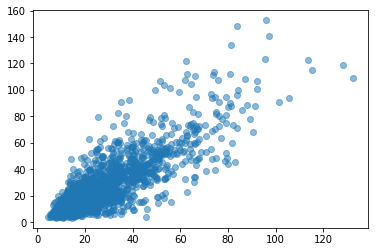

In [20]:
plt.scatter(reg.predict(X_test),y_test,alpha=0.5);

In [21]:
# create dataframe with predicted and real values from the test set
results = pd.DataFrame(data=reg.predict(X_test), columns=['prediction'])
results['real'] = y_test.values
results['difference']=results['real']-results['prediction']

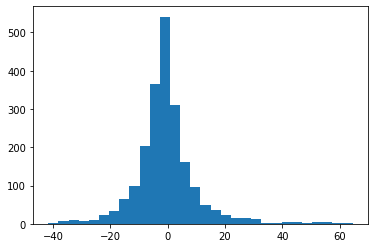

In [22]:
# distribution of the errors
plt.hist(results['difference'],bins=30);

In [23]:
# divide data on pollution levels
def pol_levels(x):
    if x <= 12:
        return 0 # healthy
    elif x > 12 and x <=35.4:
        return 1 # moderate
    elif x > 35.4 and x <=55.4:
        return 2 # unhealthy for sensitive groups
    elif x > 55.4 and x <=150.4:
        return 3 # unhealthy
    else:
        return 4 # hazardous

results['pred_lev'] = results['prediction'].apply(pol_levels)
results['real_lev'] = results['real'].apply(pol_levels)
results['diff_lev']= results['real_lev']-results['pred_lev']

In [24]:
results['diff_lev'].value_counts()

 0    1474
-1     408
 1     200
 2      18
-2      13
Name: diff_lev, dtype: int64

In [25]:
# percent of correctly predicted pollution levels
results[results['diff_lev'] == 0].shape[0]/results.shape[0]

0.6975863700899195

In [26]:
results.sample(10)

,prediction,real,difference,pred_lev,real_lev,diff_lev
586,39.70,53.9,14.20,2,2,0
2019,11.42,14.9,3.48,0,1,1
683,11.76,15.0,3.24,0,1,1
723,8.27,10.0,1.73,0,0,0
352,13.14,15.5,2.36,1,1,0
1968,30.25,28.1,-2.15,1,1,0
1288,14.01,13.4,-0.61,1,1,0
867,18.36,13.1,-5.26,1,1,0
88,11.50,9.4,-2.10,0,0,0
610,14.71,14.1,-0.61,1,1,0


In [27]:
results.describe()

,prediction,real,difference,pred_lev,real_lev,diff_lev
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,25.213777,24.604638,-0.609139,1.093232,0.999527,-0.093706
std,16.559484,19.800303,10.724515,0.721896,0.833428,0.581211
min,4.680000,3.100000,-41.600000,0.000000,0.000000,-2.000000
25%,14.370000,11.500000,-5.470000,1.000000,0.000000,0.000000
50%,19.890000,18.200000,-1.210000,1.000000,1.000000,0.000000
75%,30.970000,31.000000,3.000000,1.000000,1.000000,0.000000
max,132.350000,152.700000,64.500000,3.000000,4.000000,2.000000


In [28]:
# save the model
import pickle

In [29]:
with open('model','wb') as file:
    pickle.dump(reg,file)